# EDA Social Distancing

## Importing relevant libraries

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import datetime

import warnings
warnings.filterwarnings(action='ignore')

import functions
import get_group

## Importing relevant data

In [2]:
US_county = pd.read_csv('data/CMU_US_data/overall-county-smoothed.csv')
US_state = pd.read_csv('data/CMU_US_data/overall-state-smoothed.csv')

In [3]:
dfs_country = functions.get_data("data/CMU_Global_data/Full_Survey_Data/country/smooth/", "country")
dfs_region = functions.get_data("data/CMU_Global_data/Full_Survey_Data/region/smooth/", "region")

Read in data completed.
Read in data completed.


In [4]:
countries = pd.concat(dfs_country, ignore_index=True)
regions = pd.concat(dfs_region, ignore_index=True)

In [5]:
countries = functions.insert_month(countries)
regions = functions.insert_month(regions)
US_state = functions.insert_month(US_state)
US_county = functions.insert_month(US_county)

Created month column.
Created month column.
Created month column.
Created month column.


## Order and Palettes

In [38]:
gender_order = ["male", "female", "overall"]
age_order = ["18-34", "35-54", "55+", "overall"]

In [6]:
gender_palette =["steelblue", "darkorange", "g"]
hdi_palette = ["peru", "burlywood", "skyblue", "steelblue"]

# ***Global Data***

#### Global dataset
The following columns are relevant as they are social distancing measures:
```bash
smoothed_pct_worked_outside_home_weighted 
smoothed_pct_grocery_outside_home_weighted  
smoothed_pct_ate_outside_home_weighted  
smoothed_pct_spent_time_with_non_hh_weighted
smoothed_pct_attended_public_event_weighted  
smoothed_pct_used_public_transit_weighted  
smoothed_pct_direct_contact_with_non_hh_weighted  
smoothed_pct_no_public_weighted  
```

The following columns are relevant as they are symptoms:
```bash
smoothed_pct_cli_weighted
smoothed_pct_ili_weighted
smoothed_pct_fever_weighted
smoothed_pct_cough_weighted
smoothed_pct_difficulty_breathing_weighted
smoothed_pct_fatigue_weighted
smoothed_pct_stuffy_runny_nose_weighted
smoothed_pct_aches_muscle_pain_weighted
smoothed_pct_sore_throat_weighted 
smoothed_pct_chest_pain_weighted
smoothed_pct_nausea_weighted 
smoothed_pct_anosmia_ageusia_weighted
smoothed_pct_eye_pain_weighted
smoothed_pct_headache_weighted
smoothed_pct_chills_weighted
smoothed_pct_cmnty_sick_weighted
```

## Gender

Disgarding rows where gender is "other":

In [7]:
countries[countries["gender"]=="other"].count()

Unnamed: 0                                         16684
country_agg                                        16684
GID_0                                              16684
gender                                             16684
age_bucket                                         16684
                                                   ...  
smoothed_pct_finances_very_worried_weighted        11840
smoothed_pct_finances_somewhat_worried_weighted    11840
smoothed_pct_finances_notToo_worried_weighted      11840
smoothed_pct_finances_not_worried_weighted         11840
month                                              16684
Length: 116, dtype: int64

In [8]:
countries_no_other = countries[countries["gender"] != "other"]

<AxesSubplot:xlabel='gender', ylabel='smoothed_pct_no_public_weighted'>

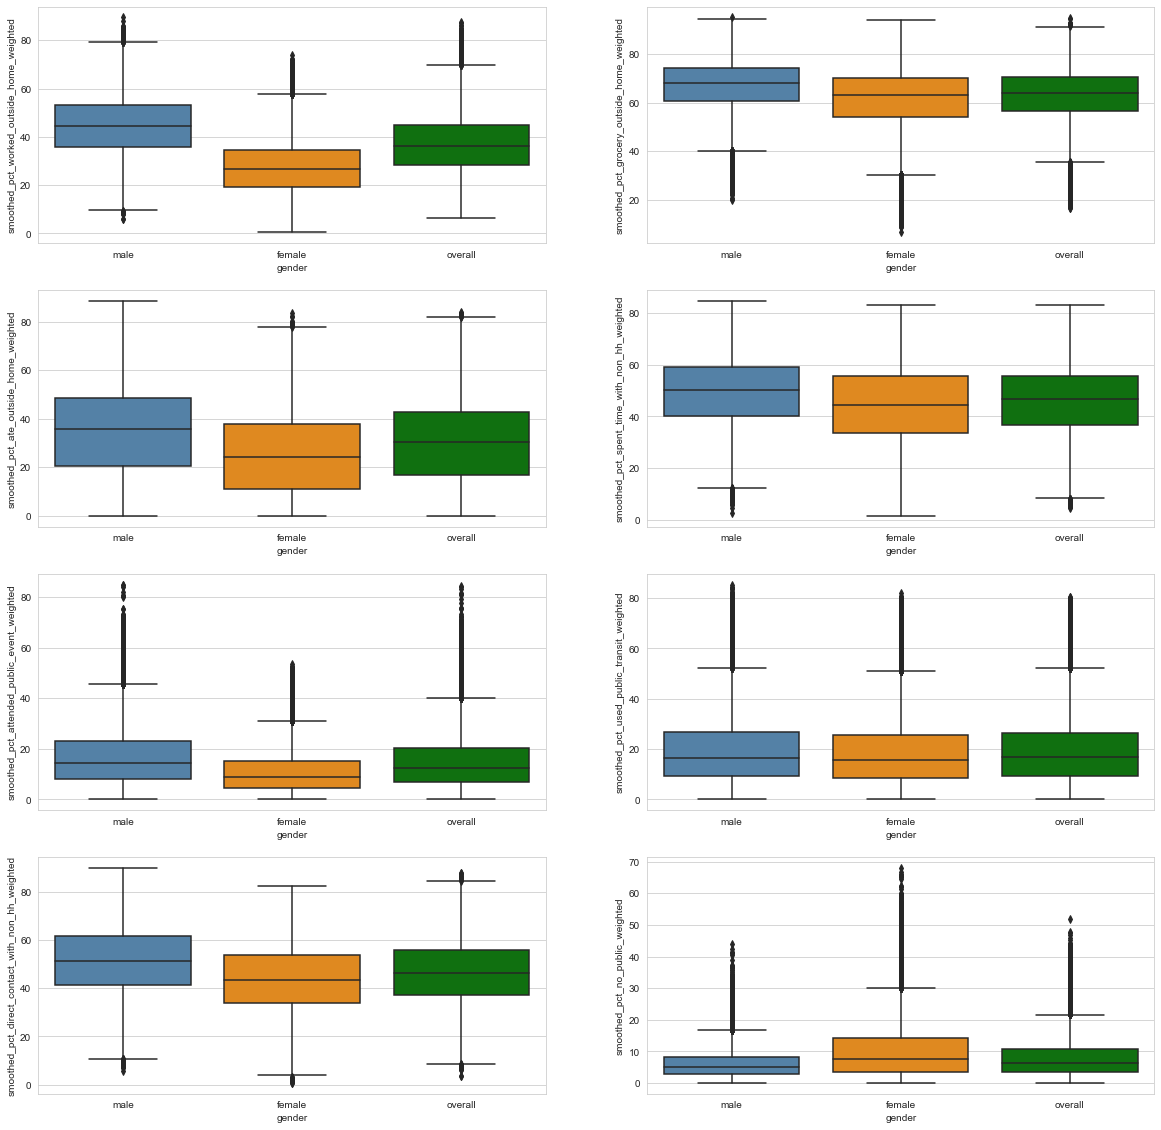

In [10]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette)
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_worked_outside_home_weighted", order=gender_order, ax=axes[0][0])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_grocery_outside_home_weighted", order=gender_order, ax=axes[0][1])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_ate_outside_home_weighted",  order=gender_order, ax=axes[1][0])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_spent_time_with_non_hh_weighted", order=gender_order, ax=axes[1][1])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_attended_public_event_weighted", order=gender_order, ax=axes[2][0])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_used_public_transit_weighted",  order=gender_order, ax=axes[2][1])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_direct_contact_with_non_hh_weighted", order=gender_order, ax=axes[3][0])
sns.boxplot(data=countries_no_other, x="gender", y="smoothed_pct_no_public_weighted", order=gender_order, ax=axes[3][1])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_cli_weighted'>

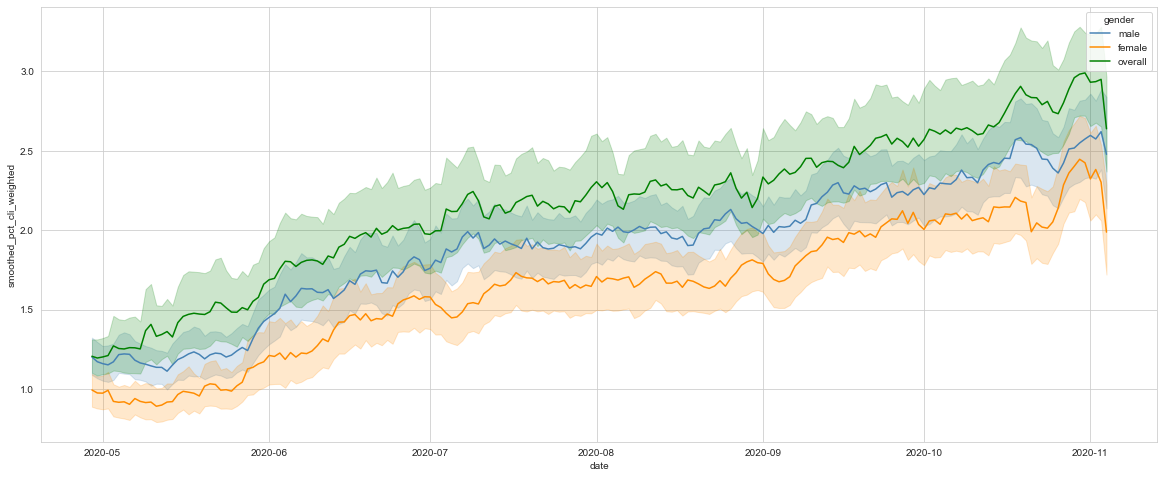

In [11]:
plt.figure(figsize=(20,8))
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_cli_weighted", hue="gender", hue_order=gender_order, palette=gender_palette)

In [12]:
countries_no_other[countries_no_other["gender"]=="male"].gender.count()

79212

In [13]:
countries_no_other[countries_no_other["gender"]=="female"].gender.count()

68977

In [14]:
countries_no_other[countries_no_other["gender"]=="overall"].gender.count()

82103

A higher percentage in men indicated covid like illness at any given time between May and November.

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

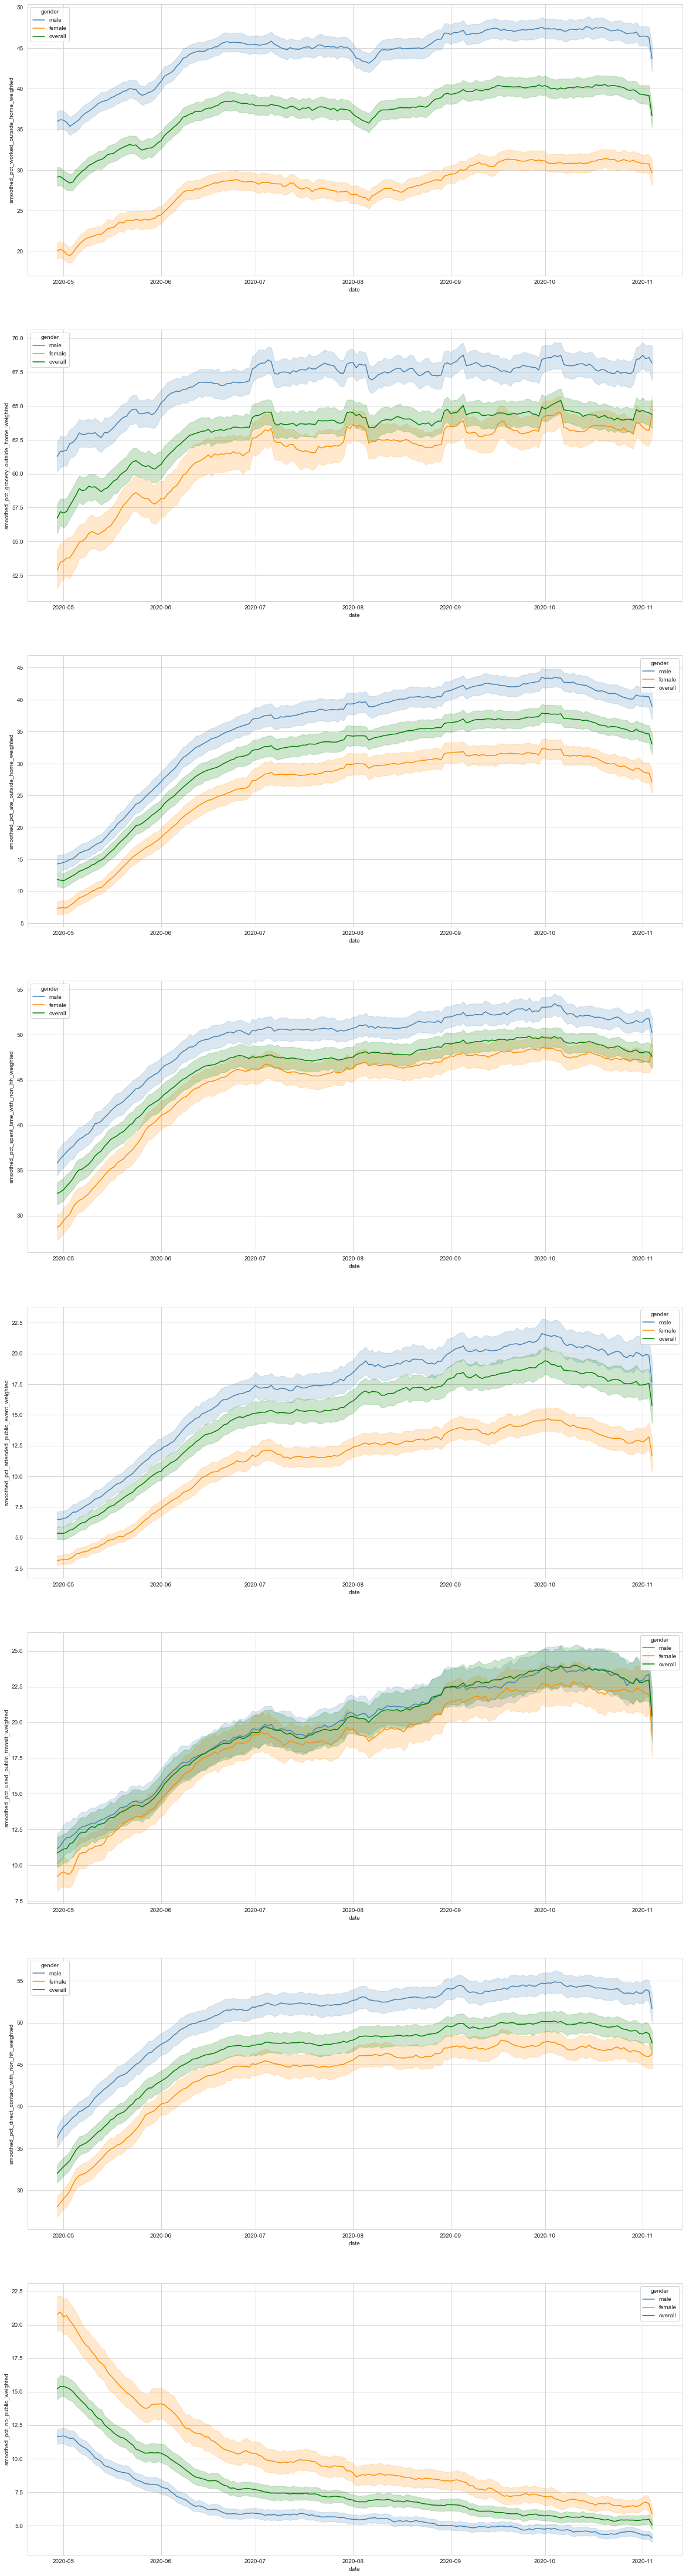

In [15]:
f, axes = plt.subplots(8,1, figsize=(20,80))
sns.set_palette(gender_palette)
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[2])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[3])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", hue_order=gender_order, ax=axes[4])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", hue_order=gender_order, ax=axes[5])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[6])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_no_public_weighted", hue="gender", hue_order=gender_order, ax=axes[7])

It can be seen by both the box plots and the time series plots that women are more socially distanced than men. More men (in the last 24hr):
* worked more from outside of their home
* went grocery shopping or to a pharmacy
* went to a restaurant, cafe or shopping centre
* spend time with someone from a different household
* attended a public event with more than 10 people
* had direct contact (spending longer than 1 minute within 2 meters, or shaking hands, hugging, or kissing) with someone from a different household  

More men had also used public transport in the last 24 hours than women, however the difference is a lot smaller than for the other indicators of social distancing.   
When looking at the percentage of individuals who reported that they have not gone in public in the last 7 days,the percentage of women is higher, which is in line with what is described above.  
There are a number of different reasons, why this could be the case. One of these is the effect of gender roles. In many regions of the world, it is still the norm for the men to go out and work, while the women looks after the household and the family. This could definitely explain the big difference in percentage of men and women leaving the house.   

Furthermore, the time series plots show us how social distancing has changed over time. Less individuals went out in public, went to work, saw people from other households etc. in May than they did in November. This can be explained by government regulations that were in place. Most countries experienced the first wave of COVID-19 around Spring this year. This resulted in many countries to go into lockdown and introducing measurers such as closing restaurants and other public places, therefore less people attended them. After the number of cases decreased again countries started openeing up and people resumed to a more normal way of life. 

## Age

<AxesSubplot:xlabel='age_bucket', ylabel='smoothed_pct_no_public_weighted'>

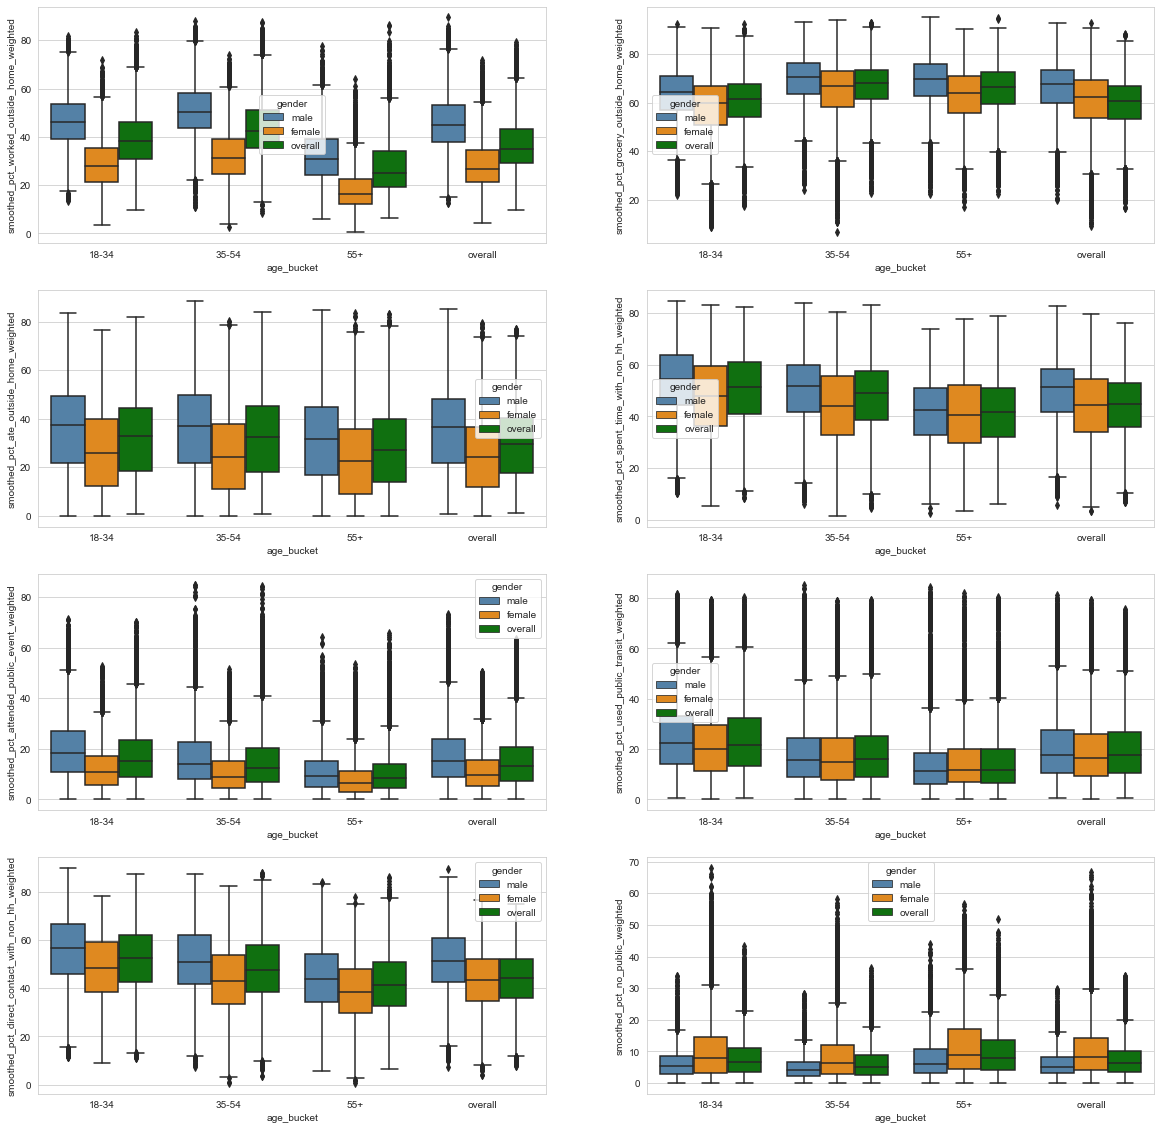

In [17]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette)

sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_worked_outside_home_weighted", hue="gender", order=age_order, hue_order=gender_order, ax=axes[0][0])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_grocery_outside_home_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[0][1])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_ate_outside_home_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[1][0])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_spent_time_with_non_hh_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[1][1])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_attended_public_event_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[2][0])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_used_public_transit_weighted", hue="gender", order=age_order, hue_order=gender_order, ax=axes[2][1])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_direct_contact_with_non_hh_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[3][0])
sns.boxplot(data=countries_no_other, x="age_bucket", y="smoothed_pct_no_public_weighted",hue="gender", order=age_order, hue_order=gender_order, ax=axes[3][1])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_cli_weighted'>

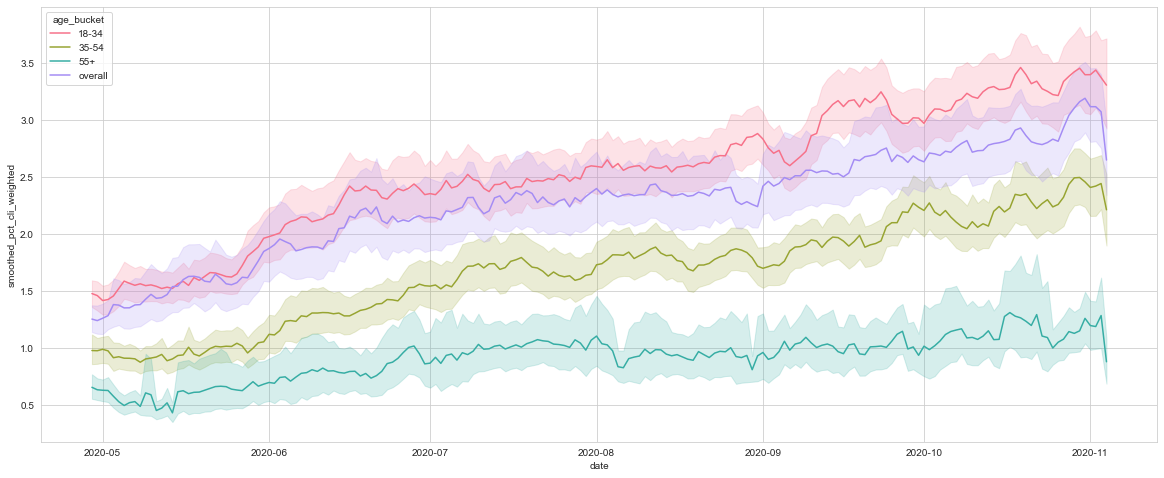

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_cli_weighted", hue="age_bucket", hue_order=age_order)

In [19]:
countries_no_other[countries_no_other["age_bucket"]=="18-34"].gender.count()

60620

In [20]:
countries_no_other[countries_no_other["age_bucket"]=="35-54"].gender.count()

58640

In [21]:
countries_no_other[countries_no_other["age_bucket"]=="55+"].gender.count()

47104

In [22]:
countries_no_other[countries_no_other["age_bucket"]=="overall"].gender.count()

63928

This graph shows that the younger the individuals the higher the percentage with COVID-like illness. The 18-34 age group, was the only age group where the percentage of individuals with COVID-like illness was above the average. However, we should keep in mind that we have most data from that age-group.

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

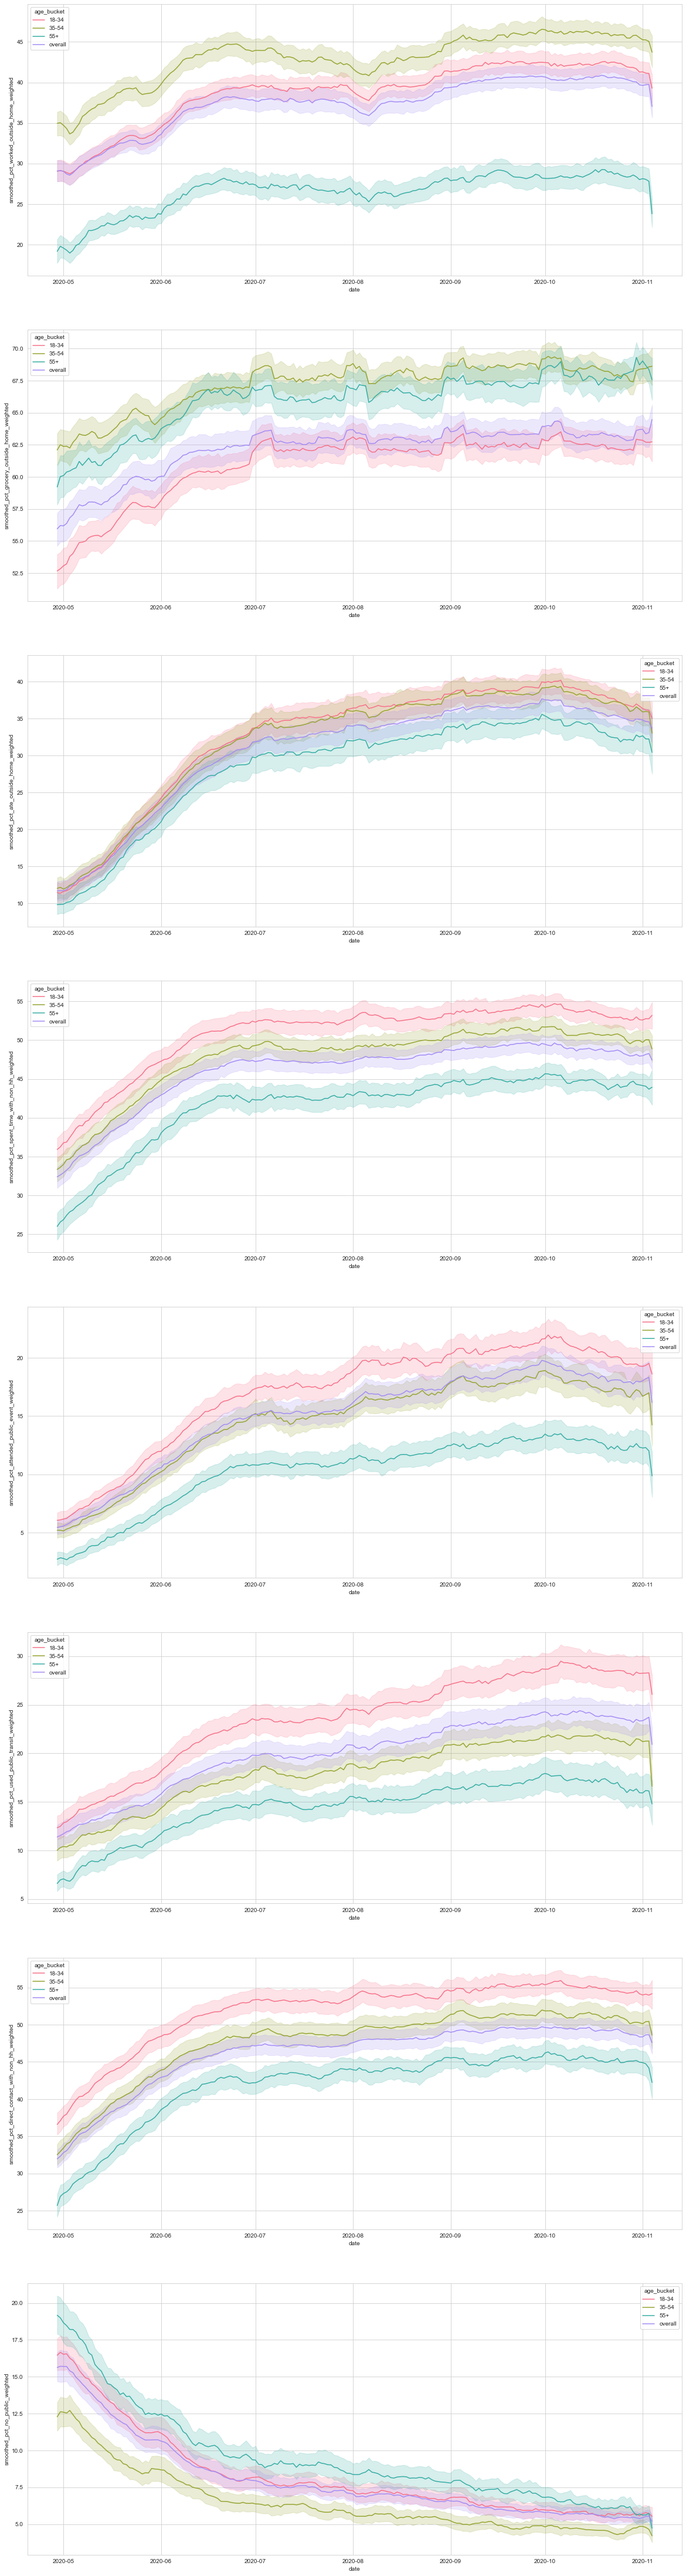

In [23]:
f, axes = plt.subplots(8,1, figsize=(20,80))

sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6])
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7])

The plots above show the general trend that older people socially distanced more than younger individuals.  
Other than leaving the house for grocery shopping or going to the pharmacy, young individuals (18-34) left their house more and were less socially distanced, while the oldest age-bucket (55+) indicated the most socially distanced behaviours, other than grocery shopping and going to the pharmacy.   
An explanation for fewer 18-34 year olds leaving to go the grocery market, could be that a significant number of them still live with their parents, and therefore one of them leaves the house to buy food. On top of that young people tend to me more likely to order their groceries online than older individuals.   
A big difference can be seen in the percentage of people who leave the house for work. The percentage of people above the age of 55+ is a lot lower, which is most likely due a lot of individuals in that age-bucket are retired.    
The reason for 55+ individuals being most socially distanced in general, and also having the highest percentage of people who have not gone in public in the last 7 days being the highest, could be explained by them belong to the high-risk group of people and therefore they are trying to protect themselves from getting infected.

# ***US Data***

The following columns have information on social distancing in the USA:
```bash
smoothed_pct_worked_outside_home_weighted
smoothed_pct_avoid_contact_all_or_most_time_weighted
smoothed_mean_outside_hh_contact_at_work_ct_weighted
smoothed_mean_outside_hh_contact_shopping_ct_weighted
smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted
smoothed_pct_contact_covid_positive_weighted
```

However, there is not really any data for 3 of those columns:
```bash
smoothed_mean_outside_hh_contact_at_work_ct_weighted  
smoothed_mean_outside_hh_contact_shopping_ct_weighted  
smoothed_mean_outside_hh_contact_in_social_gatherings_ct_weighted  
```

And for ```smoothed_pct_worked_outside_home_weighted``` and ```smoothed_pct_avoid_contact_all_or_most_time_weighted``` there is only data till the 14th of September


In [24]:
US_state_till_15_09 = US_state[US_state["date"]<"2020-09-14"]

## Gender

For ```smoothed_pct_worked_outside_home_weighted``` and ```smoothed_pct_avoid_contact_all_or_most_time_weighted```only data till the 15/09 while for ```smoothed_pct_contact_covid_positive_weighted``` whole data 

<AxesSubplot:xlabel='gender', ylabel='smoothed_pct_contact_covid_positive_weighted'>

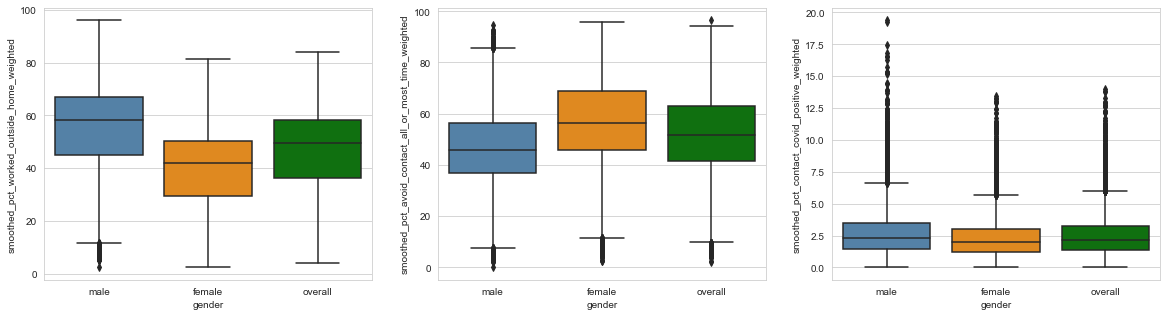

In [25]:
f, axes = plt.subplots(1,3, figsize=(20,5))
sns.set_palette(gender_palette)
sns.boxplot(data=US_state_till_15_09, x="gender", y="smoothed_pct_worked_outside_home_weighted", order=gender_order, ax=axes[0])
sns.boxplot(data=US_state_till_15_09, x="gender", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", order=gender_order, ax=axes[1])
sns.boxplot(data=US_state, x="gender", y="smoothed_pct_contact_covid_positive_weighted", order=gender_order, ax=axes[2])

* A higher percentage in men worked outside of their home
* More demales avoided contacts at all or most times
* More men has contact with COVID positive people

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_contact_covid_positive_weighted'>

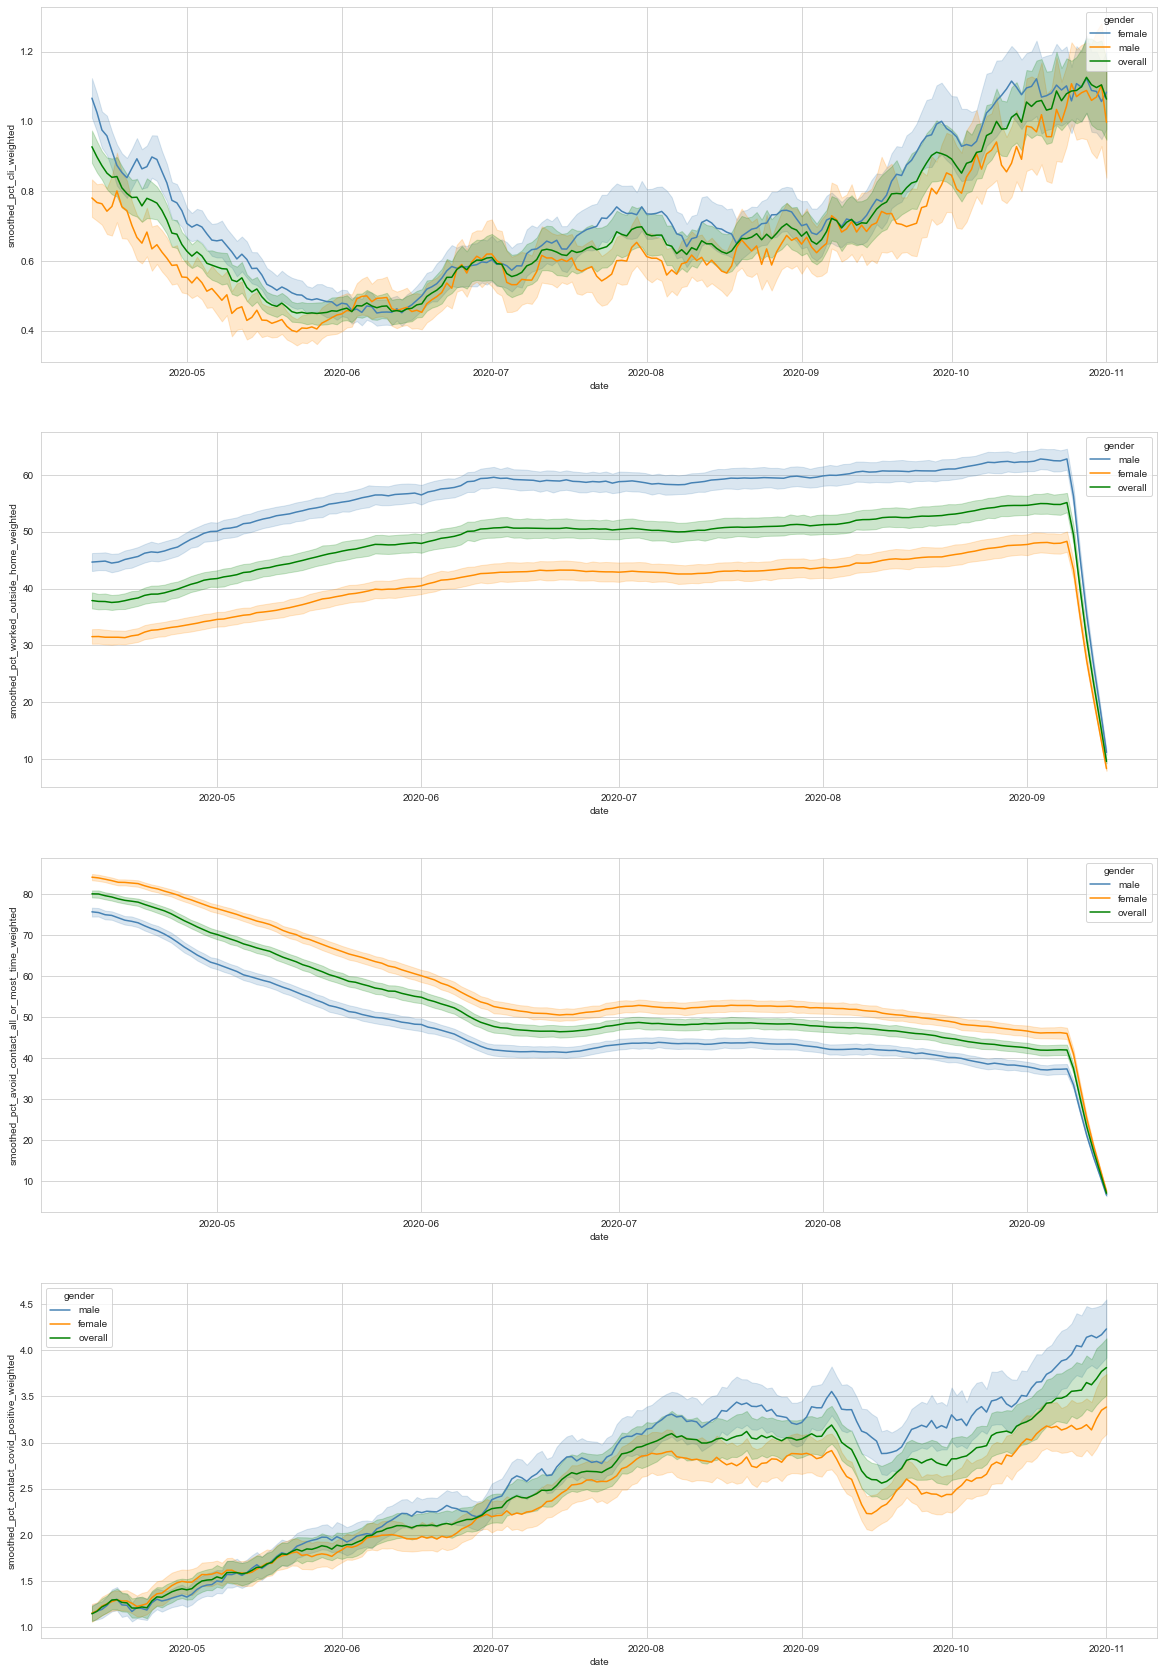

In [26]:
f, axes = plt.subplots(4,1, figsize=(20,30))
sns.set_palette(gender_palette)
sns.lineplot(data=US_state, x="date", y="smoothed_pct_cli_weighted", hue="gender", ax=axes[0])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="gender", hue_order=gender_order, ax=axes[2])
sns.lineplot(data=US_state, x="date", y="smoothed_pct_contact_covid_positive_weighted", hue="gender", hue_order=gender_order, ax=axes[3])


As seen by the boxplots as well as the timeseries graphs, more men worked outside of their home at any given time, while more women avoided contacts at all or most times. Between the 12th of April and the 13th of September the number of people working outside of their own home increased by over 10%, while the number of people avoiding all or most contacts decreased by nearly 40%.  
The percentage of people who reported COVID-like illness decreased till June and then gradually increased again for the next 5 months. The number of people who reported contact with a COVID positive person increased steadily, with a small dip in September. 

## Age

In [27]:
countries_no_other.hdi_level.unique()

<AxesSubplot:xlabel='age_bucket', ylabel='smoothed_pct_contact_covid_positive_weighted'>

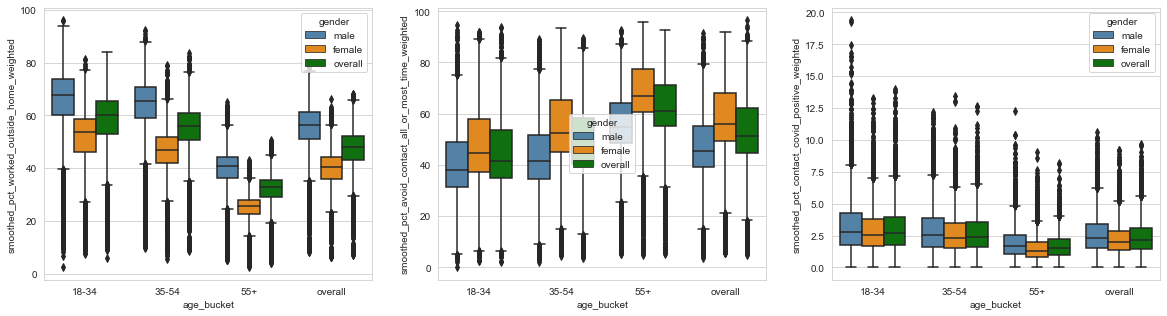

In [83]:
f, axes = plt.subplots(1,3, figsize=(20,5))
sns.set_palette(gender_palette)
sns.boxplot(data=US_state_till_15_09, x="age_bucket", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0])
sns.boxplot(data=US_state_till_15_09, x="age_bucket", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="gender", hue_order=gender_order, ax=axes[1])
sns.boxplot(data=US_state, x="age_bucket", y="smoothed_pct_contact_covid_positive_weighted", hue="gender", hue_order=gender_order, ax=axes[2])

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_contact_covid_positive_weighted'>

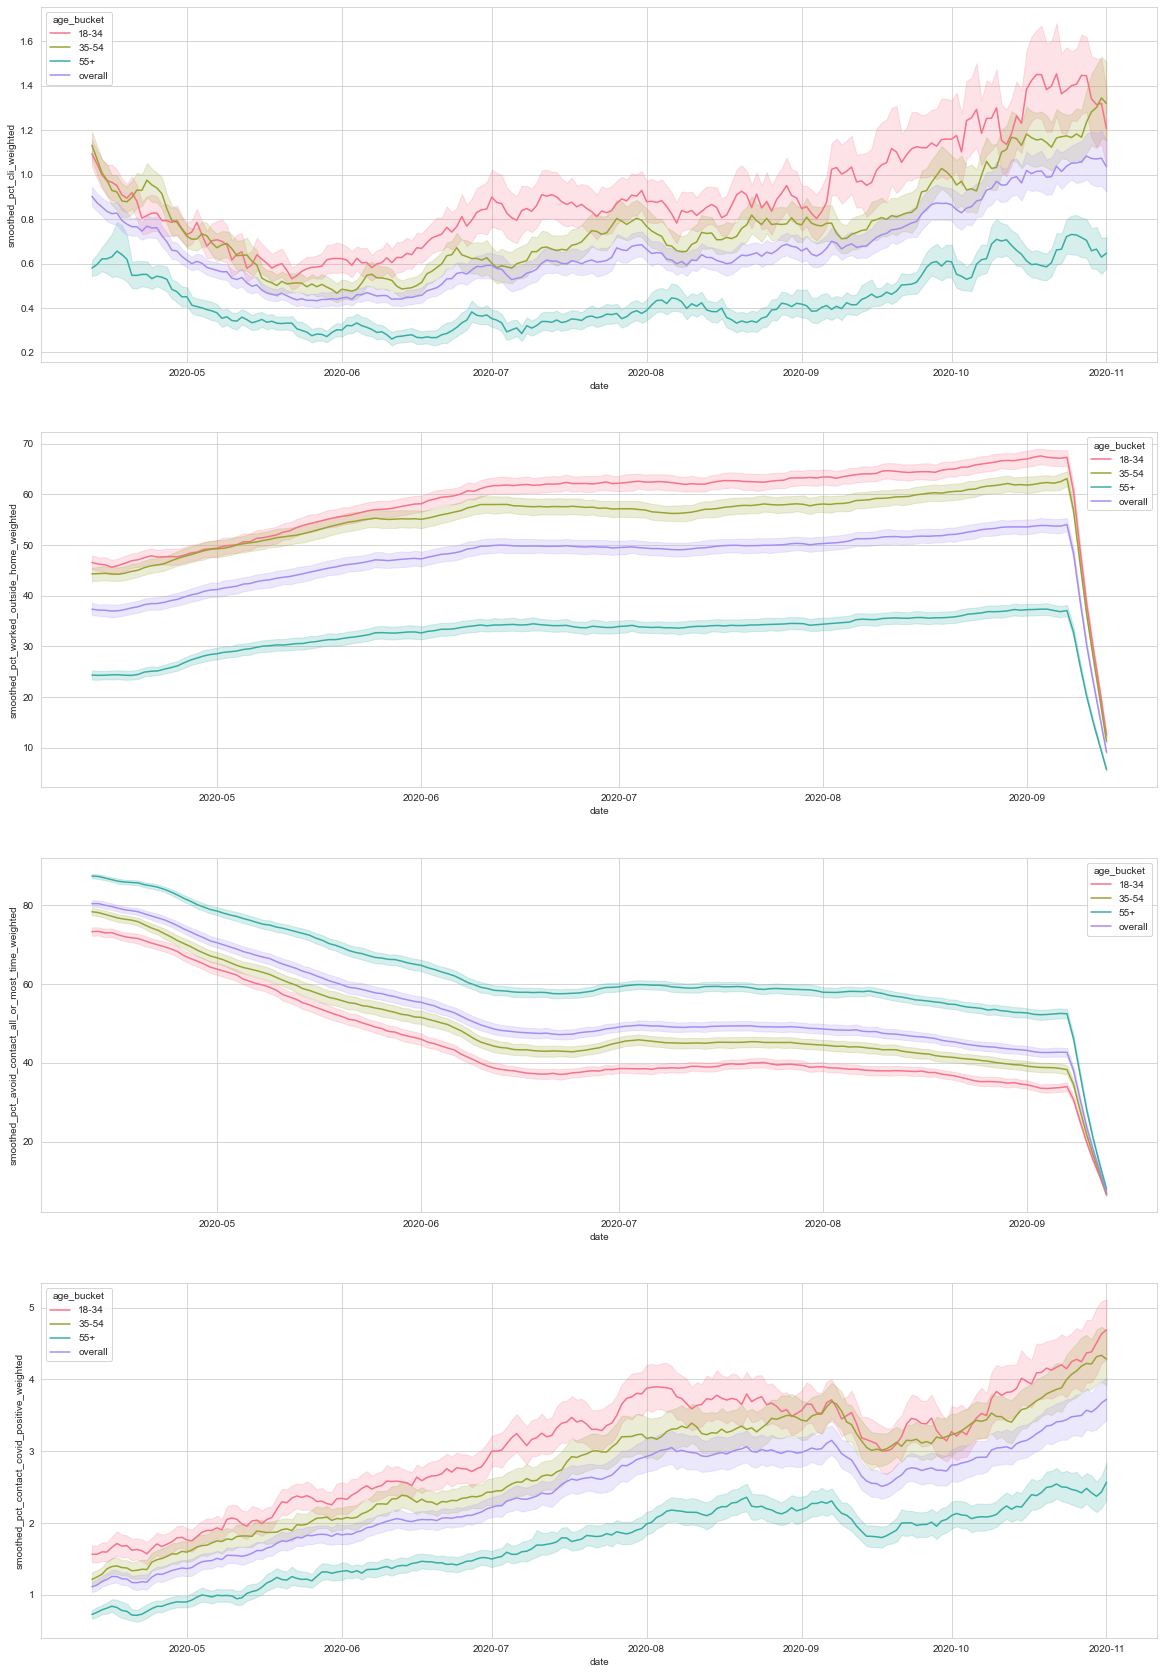

In [28]:
f, axes = plt.subplots(4,1, figsize=(20,30))

sns.lineplot(data=US_state, x="date", y="smoothed_pct_cli_weighted", hue="age_bucket", ax=axes[0])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", ax=axes[1])
sns.lineplot(data=US_state_till_15_09, x="date", y="smoothed_pct_avoid_contact_all_or_most_time_weighted", hue="age_bucket", ax=axes[2])
sns.lineplot(data=US_state, x="date", y="smoothed_pct_contact_covid_positive_weighted", hue="age_bucket", ax=axes[3])

The trends seen in the US dataset are in line, with what we observed in the global dataset. People aged 55+ were least likely to work outside of their own home, as this age bucket also includes the already retired population. This age bucket also avoids contacts the most, which could be explained by them being most at risk of a serious COVID illness. 

# Effect of Human Development Index on Social Distancing

http://hdr.undp.org/en/content/human-development-index-hdi

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities.
The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

#### HDI levels
* **Low:** HDI < 0.55  
* **Medium:** 0.55 <= HDI < 0.7  
* **High:** 0.7 <= HDI < 0.8  
* **Very High:** 0.8 <= HDI

In [29]:
# Getting the dictionaries for the hdi and the hdi-levels.
dict_hdi_index, dict_hdi_levels = functions.get_hdi("data","hdro_statistical_data_tables_1_15_d1_d5.xlsx")

# Creating a new column with the hdi and the hdi-levels in the regions dataframe
countries_no_other = functions.create_hdi_columns(countries_no_other, dict_hdi_index, dict_hdi_levels)

Creating dictionaries for hdi and hdi-levels completed.
Creating hdi list completed.
Creating hdi-level list completed.


In [30]:
hdi = get_group.group_hdi(countries_no_other)
hdi_low = hdi[0]
hdi_medium = hdi[1]
hdi_high = hdi[2]
hdi_very_high = countries_no_other[countries_no_other["hdi_level"]== "very high"]

In [31]:
hdi_order = ["low", "medium", "high", "very high"]

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

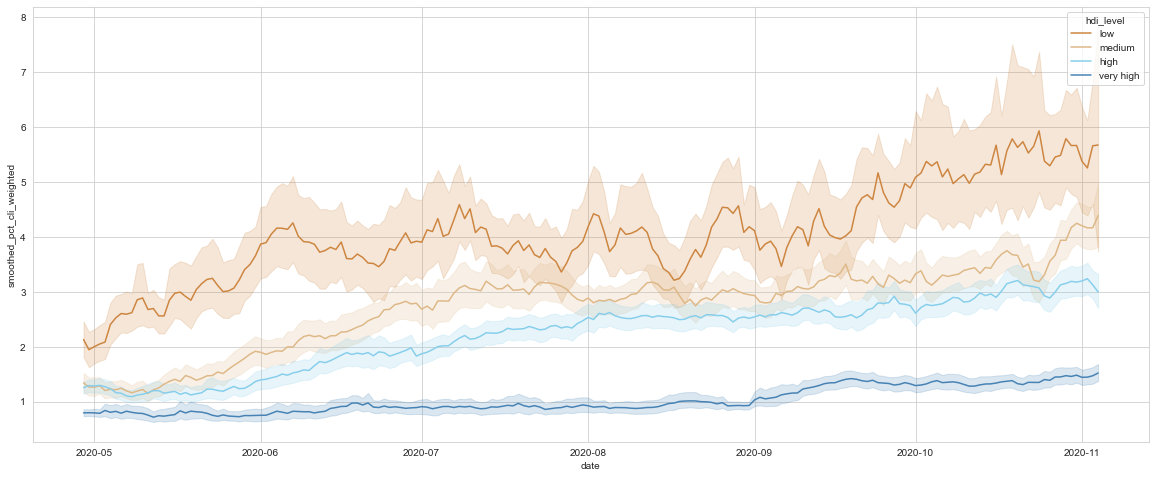

In [32]:
plt.figure(figsize=(20,8))
sns.set_palette("BrBG")
sns.lineplot(data=countries_no_other, x="date", y="smoothed_pct_cli_weighted", hue="hdi_level", hue_order=hdi_order, palette=hdi_palette)

This graph suggests a correlation between the HDI of a country and the percentage of individuals with COVID-like illness. The low HDI countries show the highest rate of individuals with COVID-like illness (nearly up to 6%), while countries with a very high HDI have the lowest percentage (max ~1.5%). 

<AxesSubplot:xlabel='hdi_level', ylabel='smoothed_pct_no_public_weighted'>

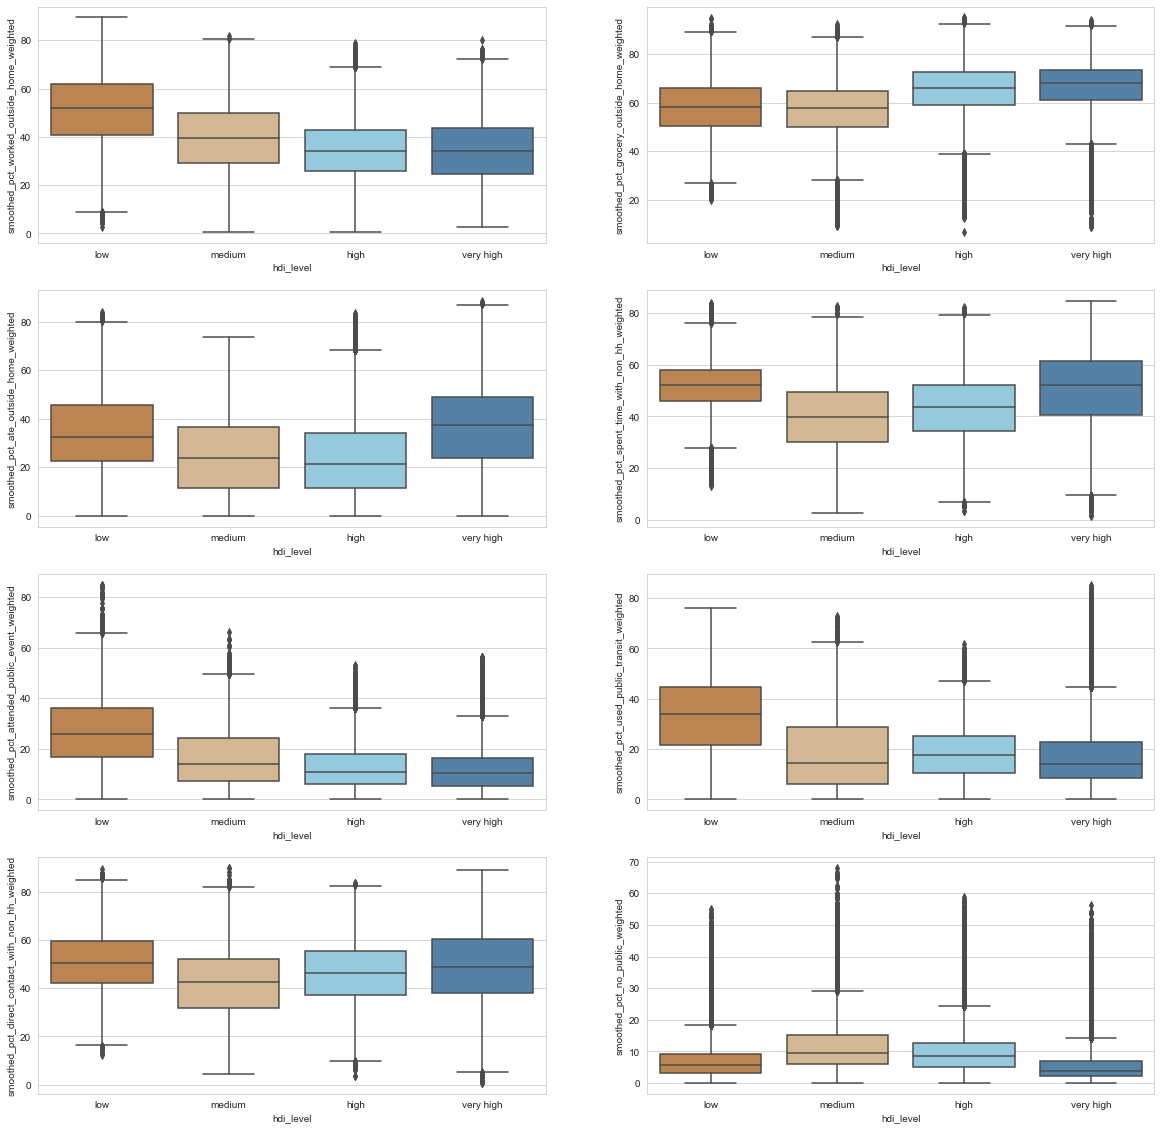

In [33]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(hdi_palette)

sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_worked_outside_home_weighted", order=hdi_order, ax=axes[0][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_grocery_outside_home_weighted", order=hdi_order, ax=axes[0][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_ate_outside_home_weighted", order=hdi_order, ax=axes[1][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_spent_time_with_non_hh_weighted", order=hdi_order, ax=axes[1][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_attended_public_event_weighted", order=hdi_order, ax=axes[2][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_used_public_transit_weighted", order=hdi_order, ax=axes[2][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_direct_contact_with_non_hh_weighted", order=hdi_order, ax=axes[3][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_no_public_weighted", order=hdi_order, ax=axes[3][1])

<AxesSubplot:xlabel='hdi_level', ylabel='smoothed_pct_no_public_weighted'>

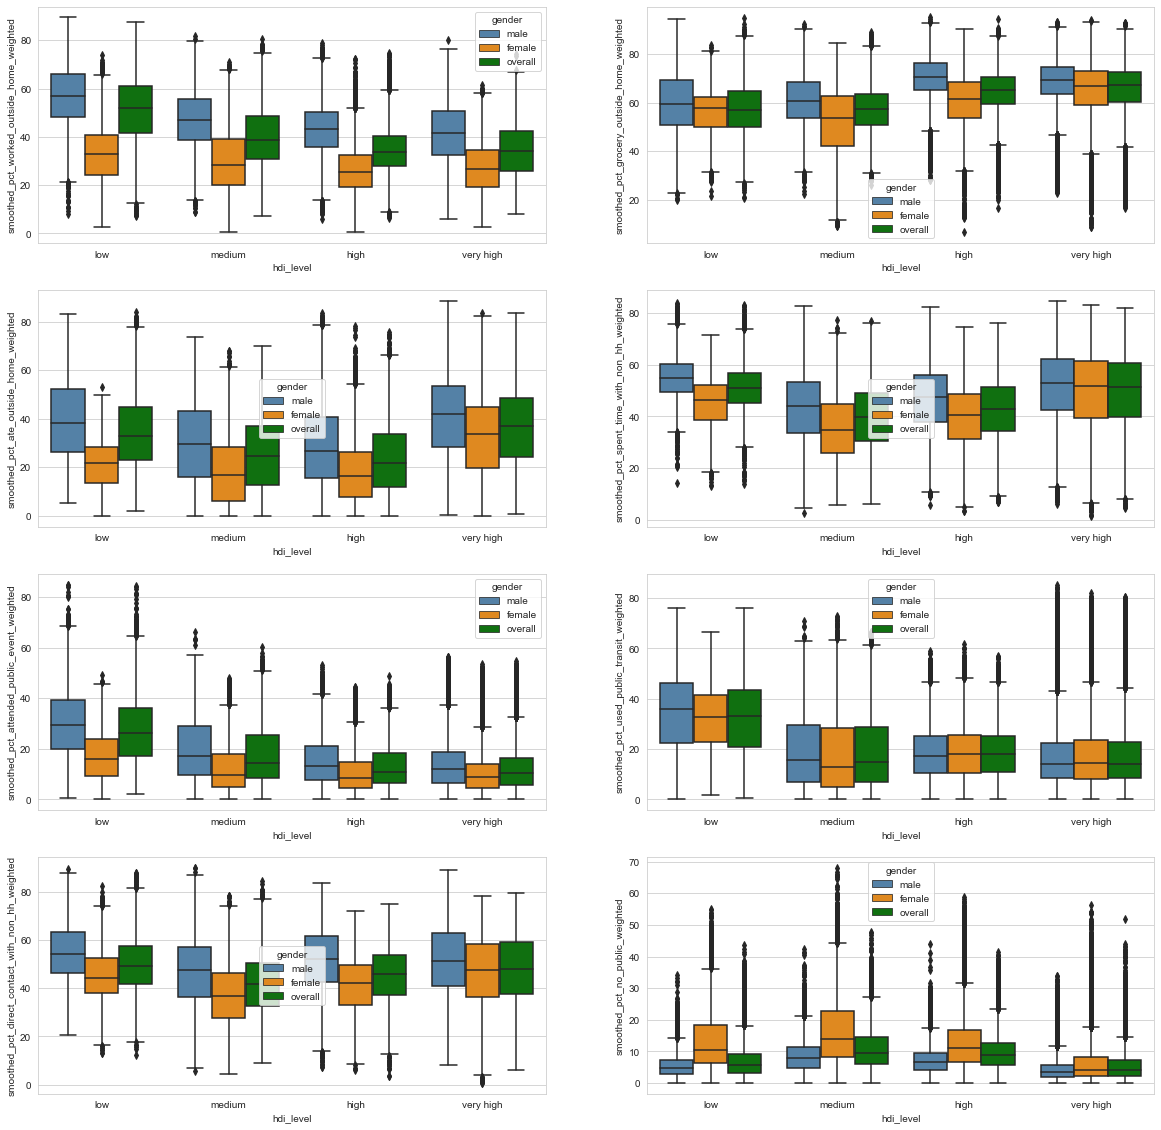

In [34]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.set_palette(gender_palette)

sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_worked_outside_home_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[0][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_grocery_outside_home_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[0][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_ate_outside_home_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[1][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_spent_time_with_non_hh_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[1][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_attended_public_event_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[2][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_used_public_transit_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[2][1])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_direct_contact_with_non_hh_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[3][0])
sns.boxplot(data=countries_no_other, x="hdi_level", y="smoothed_pct_no_public_weighted", order=hdi_order, hue="gender", hue_order=gender_order, ax=axes[3][1])

## HDI gender

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

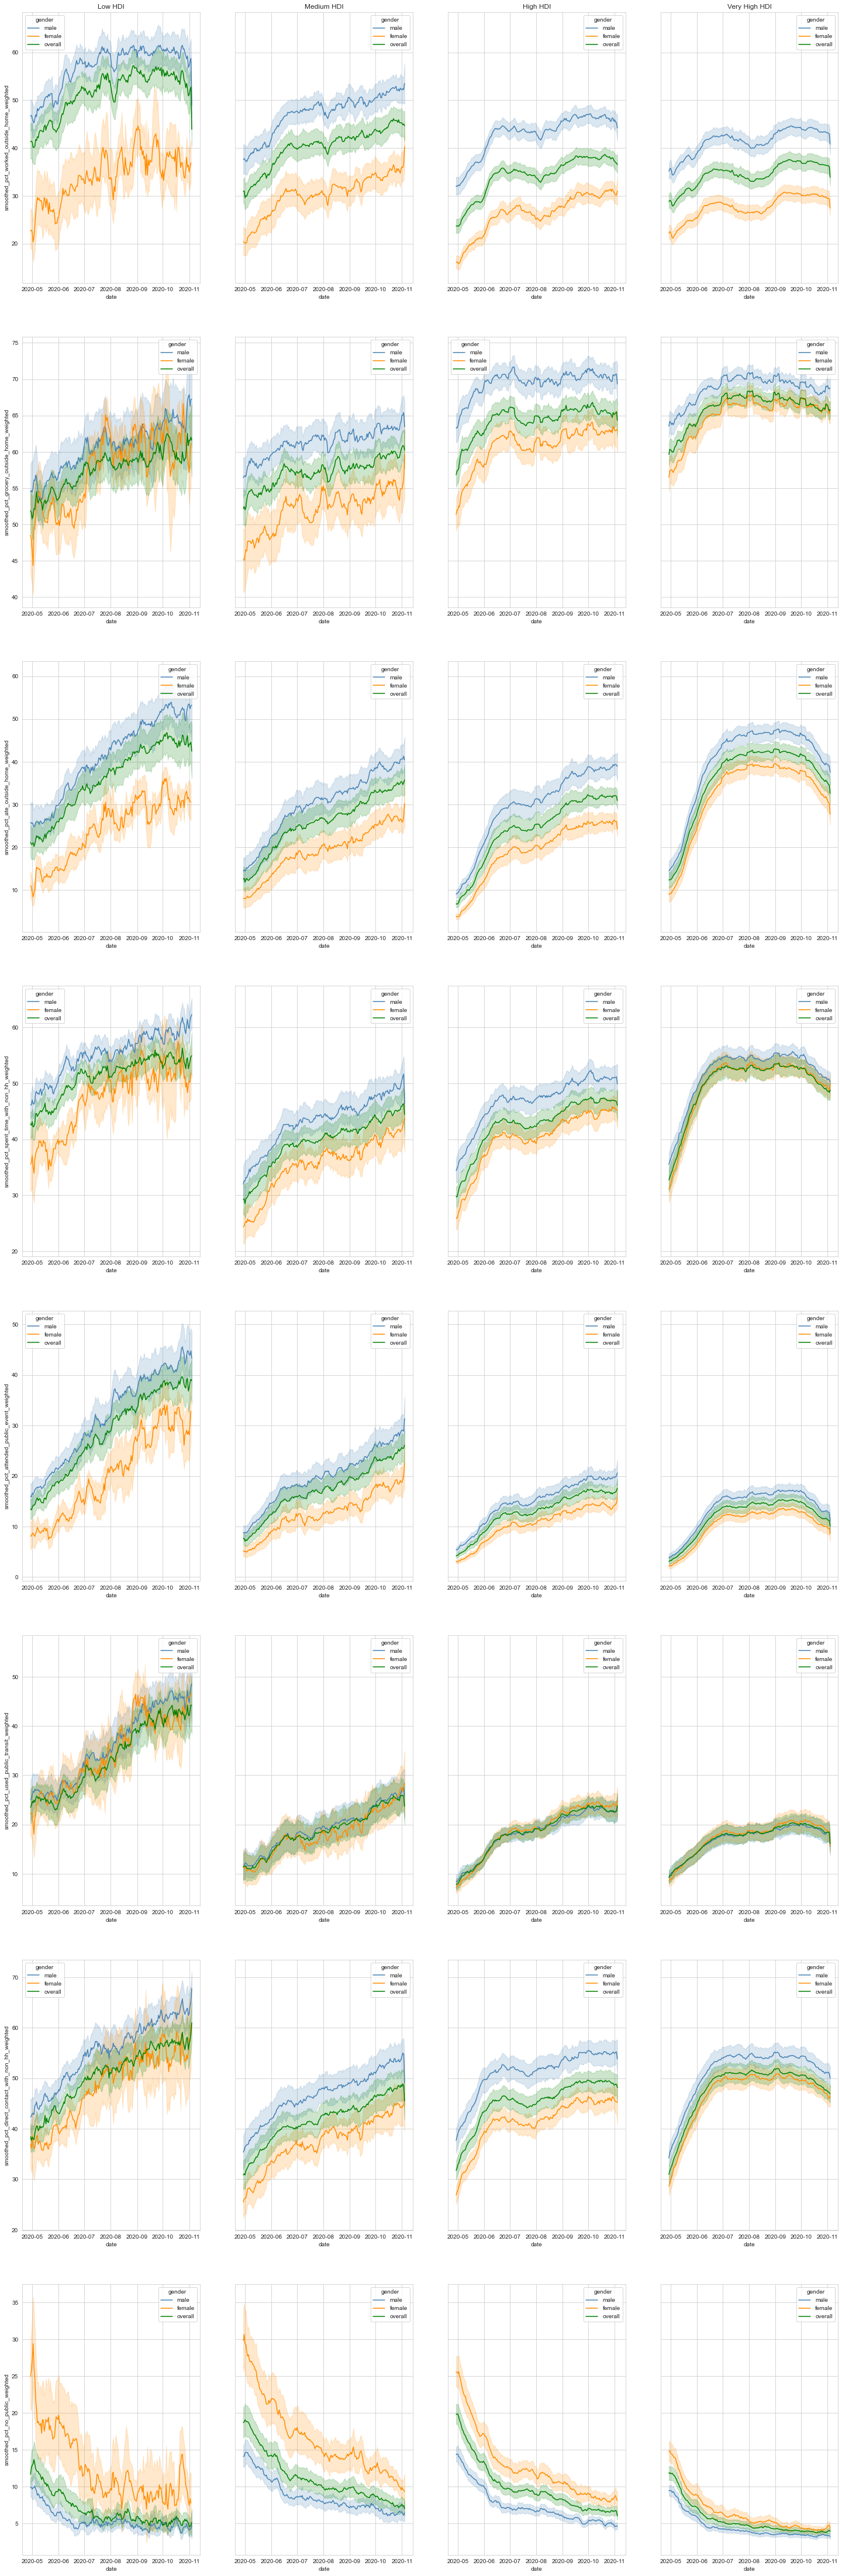

In [35]:
f, axes = plt.subplots(8,4, figsize=(25,80), sharey='row')
sns.set_palette(gender_palette)

axes[0][0].set_title("Low HDI")
axes[0][1].set_title("Medium HDI")
axes[0][2].set_title("High HDI")
axes[0][3].set_title("Very High HDI")

sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[2][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[3][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", hue_order=gender_order, ax=axes[4][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", hue_order=gender_order, ax=axes[5][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[6][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_no_public_weighted", hue="gender", hue_order=gender_order, ax=axes[7][0])

sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[2][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[3][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", hue_order=gender_order, ax=axes[4][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", hue_order=gender_order, ax=axes[5][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[6][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_no_public_weighted", hue="gender", hue_order=gender_order, ax=axes[7][1])

sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[2][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[3][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", hue_order=gender_order, ax=axes[4][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", hue_order=gender_order, ax=axes[5][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[6][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_no_public_weighted", hue="gender", hue_order=gender_order, ax=axes[7][2])

sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[0][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[1][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="gender", hue_order=gender_order, ax=axes[2][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[3][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_attended_public_event_weighted", hue="gender", hue_order=gender_order, ax=axes[4][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_used_public_transit_weighted", hue="gender", hue_order=gender_order, ax=axes[5][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="gender", hue_order=gender_order, ax=axes[6][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_no_public_weighted", hue="gender", hue_order=gender_order, ax=axes[7][3])


As previously thought, there is a difference in social distancing measures between countries of different HDI scores.  
* When looking at the percentage of individuals who reported that they work outside of their own home, a difference can mostly be seen when looking a the low HDI countries. Here a much higher percentage of individuals worked outside of their own home (~15% difference compared to very high HDI). The difference between the other three levels of HDI is lower;  however, it still follows a trend that a higher HDI suggests more people are working from home. Furthermore, when looking at the low HDI countries, a considerable difference can be seen between males and females. This difference is less prevalent, but still present, in the other three levels of HDI. A reason for why more people work from outside their own home is the kinds of jobs people have in different countries. In lower HDI countries, more individuals work in the production of goods, farming etc. compared to high HDI countries. These jobs are impossible to be performed from home, while jobs which the majority of individuals hold in high HDI countries are a lot easier done remotely.
* Concerning the percentage of individuals who left their house for groceries, countries with a medium HDI are lowest, followed by a low HDI and then high and very high HDI. The difference between men and women is most apparent in high HDI countries, followed by medium HDI countries. In contrast, the difference in low and very high HDI countries is a lot less (in low HDI countries the percentage varies a lot and therefore it is difficult to analyse). 
* Regarding the percentage of individuals going out for meals, very high and low HDI countries score highest. A trend can be seen in the difference between men and women eating out: the higher the HDI, the more similar the percentage of men and women going out for meals is. 
* The HDI level where the most individuals indicated that they spent time with non-household members are low HDI countries, the percentage then drops for medium HDI countries and then slowly increases again. As with other social distancing indicators, the difference between men and women decreases are HDI increases.
* Low HDI countries have the highest percentage of individuals who spend time with other households, followed by very high HDI. The difference between men and women decreases as HDI increases.
* The percentage of public event attendance shows a  negative correlation to the HDI. As HDI increases, fewer people attended public events.
* As expected the percentage of people using public transport decreases as HDI increases. This trend can be explained more people in low HDI countries working outside of their own home, and therefore have to commute to work. Another explanation is that more individuals in high HDI countries own cars and therefore do not need to use public transport on their way to work. The difference between males and females, for all HDI levels, is a lot smaller than in the other social distancing measures. 
* As for other social distancing measures, countries with a low HDI have the highest percentage of individuals who are in direct contact with non-household members. Once again, there is a difference between males and females, which decreases as HDI increases (medium and high HDI is the same). 
* The number of individuals who had no contact to the public within the past 14 days decreases as HDI increases and the difference between men and women decreases as well.

Overall we can see that HDI, especially has an impact on the difference between men and women. In countries with a higher HDI, the difference between genders is a lot smaller, which was expected due to social and cultural norms in countries with a higher development index.   
On top of that, an overall decrease in social distancing can be seen over time. As previously mentioned, many countries introduced a lockdown in Spring this year, which prevented people from leaving their houses and interacting with other people. As these restrictions ended, more people left their houses again, which explains the overall decrease in social distancing measures. 

## HDI Age - not as interesting as gender

<AxesSubplot:xlabel='date', ylabel='smoothed_pct_no_public_weighted'>

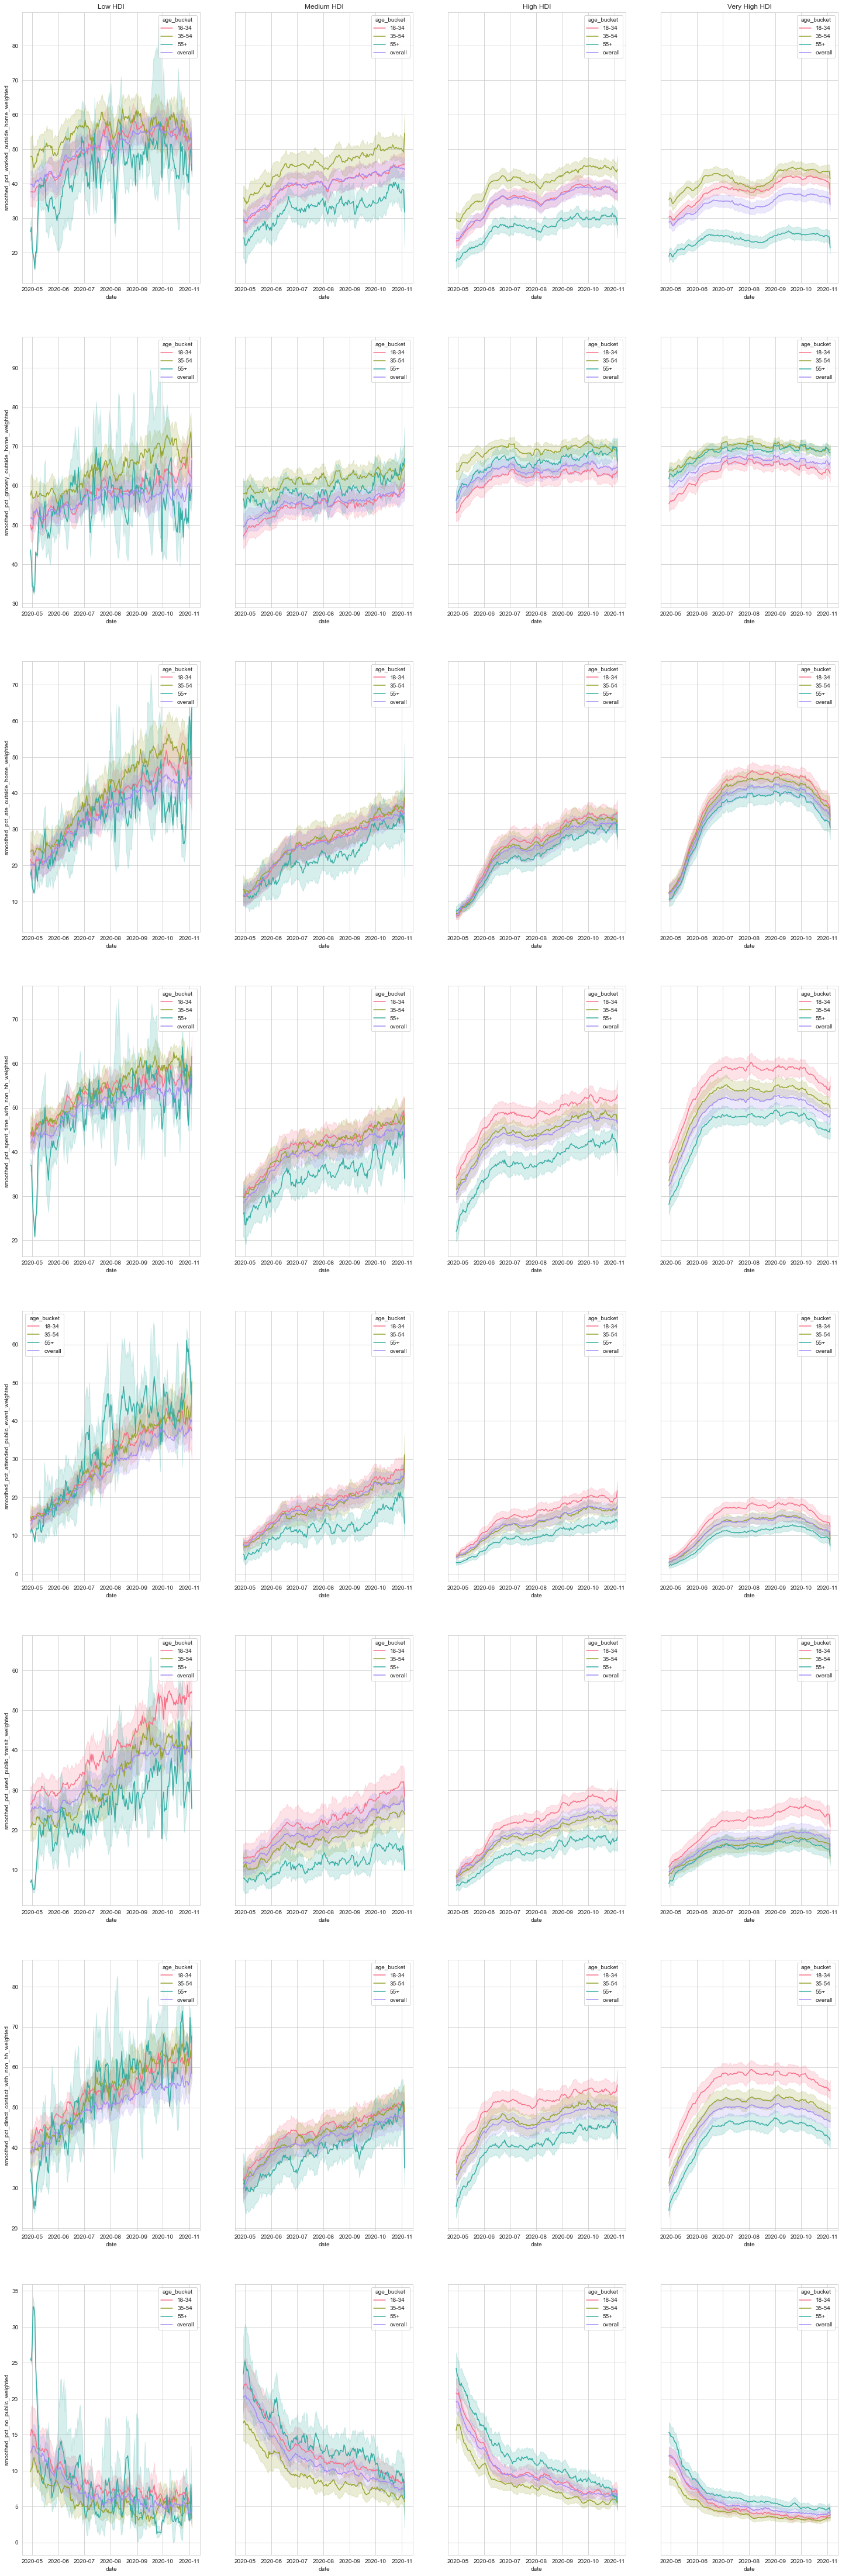

In [36]:
f, axes = plt.subplots(8,4, figsize=(25,80), sharey='row')

axes[0][0].set_title("Low HDI")
axes[0][1].set_title("Medium HDI")
axes[0][2].set_title("High HDI")
axes[0][3].set_title("Very High HDI")

sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6][0])
sns.lineplot(data=hdi_low, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7][0])

sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6][1])
sns.lineplot(data=hdi_medium, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7][1])

sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6][2])
sns.lineplot(data=hdi_high, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7][2])

sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_worked_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[0][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_grocery_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[1][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_ate_outside_home_weighted", hue="age_bucket", hue_order=age_order, ax=axes[2][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_spent_time_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[3][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_attended_public_event_weighted", hue="age_bucket", hue_order=age_order, ax=axes[4][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_used_public_transit_weighted", hue="age_bucket", hue_order=age_order, ax=axes[5][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_direct_contact_with_non_hh_weighted", hue="age_bucket", hue_order=age_order, ax=axes[6][3])
sns.lineplot(data=hdi_very_high, x="date", y="smoothed_pct_no_public_weighted", hue="age_bucket", hue_order=age_order, ax=axes[7][3])
